# CA2 AA1 CNN

## Cianan Nicolai, X00160711

### Jupyter Notebook Structure:

> Image Collection (describing the images and where/how you sourced them – 500-word limit) (14 m)

> Image Preprocessing (12 m)

> Development of initial CNN topology (14 m)

> Hyperparameter tuning of batch size, epochs and kernel filter sizes (batch sizes x 3 (suitable epochs), and two different kernel sizes) (21 m)

> Development of two further deeper CNN topologies (based on best hyperparameters from the previous model). (8 m)

> Final model, run on 10 sample unseen images per class. (17 m)

> Calculation and reporting of performance ( accuracy only, using this test set.)(8 m)

> Overall approach to development fo the CNN (8 m)

In [48]:
# Tensorflow 2
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten


import matplotlib.pyplot as plt
%matplotlib inline  
import time

from PIL import Image
import glob

# Specific to VGG16 and Transfer learning
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator



## Image Collection (describing the images and where/how you sourced them – 500-word limit) (14 m)

## Image Preprocessing (12 m)

### Nokia

<PIL.Image.Image image mode=L size=32x32 at 0x7F55F2B212E0>


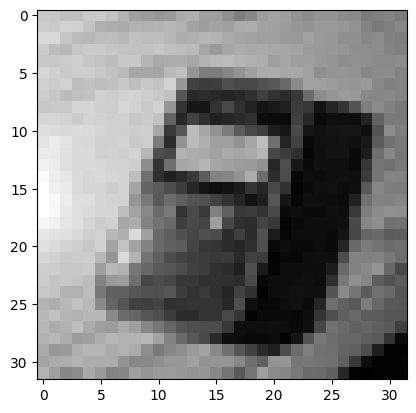

<PIL.Image.Image image mode=L size=32x32 at 0x7F5604003AF0>


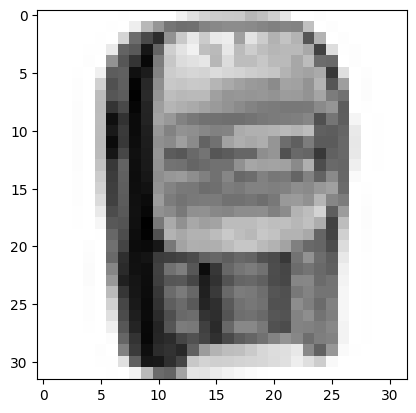

<PIL.Image.Image image mode=L size=32x32 at 0x7F55F8E9D1F0>


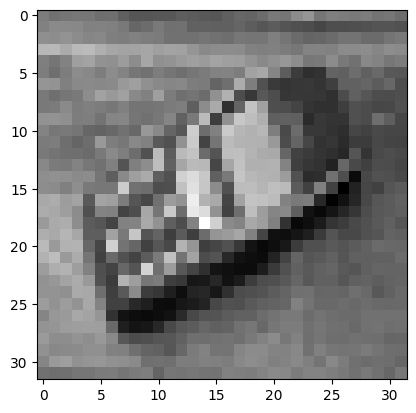

In [ ]:
image_list_nokia = []

w = 32
h = 32


for filename in glob.glob('/content/drive/MyDrive/CNN-Nokia-vs-iPhone/nokia/*'):
    im = Image.open(filename).convert('L')
    im = im.resize((w,h),Image.ANTIALIAS)
    image_list_nokia.append(im)
    
for item in image_list_nokia[:3]:
    print(item)
    plt.imshow(item, cmap="gray")
    plt.show()
    
for index, image in enumerate(image_list_nokia):
    image.save("/content/drive/MyDrive/CNN-Nokia-vs-iPhone/processednokiaLive/image-"+str(index)+".jpg")

### iPhone

<PIL.Image.Image image mode=L size=32x32 at 0x7F55F8E7F130>


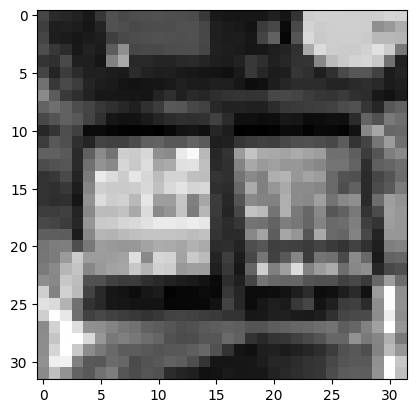

<PIL.Image.Image image mode=L size=32x32 at 0x7F55F8FE3580>


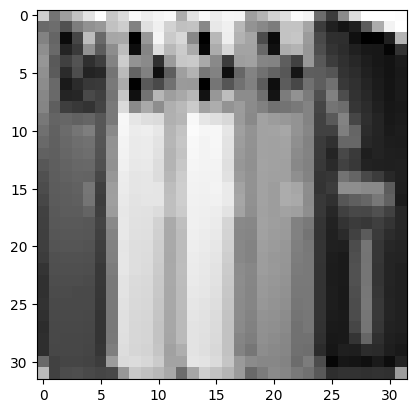

<PIL.Image.Image image mode=L size=32x32 at 0x7F560045E040>


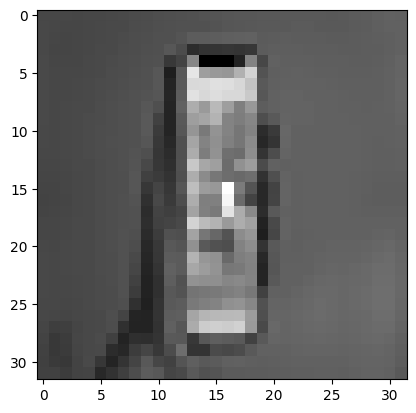

In [ ]:
image_list_iphone = []

w = 32
h = 32

for filename in glob.glob('/content/drive/MyDrive/CNN-Nokia-vs-iPhone/iPhone/*'):
    im = Image.open(filename).convert('L')
    im = im.resize((w,h),Image.ANTIALIAS)
    image_list_iphone.append(im)
    

for item in image_list_iphone[:3]:
    print(item)
    plt.imshow(item, cmap="gray")
    plt.show()
    
for index, image in enumerate(image_list_iphone):
    image.save("/content/drive/MyDrive/CNN-Nokia-vs-iPhone/processediphoneLive/image-"+str(index)+".jpg")

In [50]:


# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# Load data
X =[]
Y =[]

# nokia
for filename in glob.glob('/content/drive/MyDrive/CNN-Nokia-vs-iPhone/nokia/*.jpg'):
    im=Image.open(filename)
    arr = np.array(im)
    X.append(arr)
    Y.append(0)  # nokia
    
#iphone
for filename in glob.glob('/content/drive/MyDrive/CNN-Nokia-vs-iPhone/processediphoneLive/*.jpg'):
    im=Image.open(filename)
    arr = np.array(im)
    X.append(arr)
    Y.append(1)  # iphone



In [51]:
# Convert to NP array
X = np.array(X)

#Get number of Pixels
num_pixels = X.shape[1] * X.shape[2]   # 28 * 28 = 784

# Flatten
X = X.reshape(X.shape[0], num_pixels).astype('float32')

# Normalize the data
X = X /255

# Convert to NP array
Y = np.array(Y)

# randomize the data set - numpy arrays
randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
Y = Y[randomize]



Y = to_categorical(Y)
num_classes = Y.shape[1]

<ipython-input-51-5f595a24196f>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)


IndexError: ignored

In [ ]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# 64 and bigger ran into an OOM
w = 32
h = 32

# Load data
X =[]
Y =[]

for filename in glob.glob('/content/drive/MyDrive/CNN-Nokia-vs-iPhone/nokia/*'):
    # Convert each image to greay scale
    im=Image.open(filename).convert('L')
    
    # Resize the images
    im = im.resize((w,h),Image.ANTIALIAS)
    
    #Show each image for the CA
    
    # Convert to numpy array
    arr = np.array(im)
    
    # add images and class to the two lists
    X.append(arr)
    Y.append(1)  # Jack russel class 

# same below
for filename in glob.glob('/content/drive/MyDrive/CNN-Nokia-vs-iPhone/iPhone/*' ):
    im=Image.open(filename).convert('L')
    im = im.resize((w,h),Image.ANTIALIAS)
    arr = np.array(im)
    X.append(arr)
    Y.append(2)  # Ridgeback class


    
# Convert to NP array
X = np.array(X)


# reshape to be [samples][channels][width][height]

# in case CPU must be channels last

X = X.reshape(X.shape[0], w, h, 1 ).astype('float32')

# Normalize the data
X = X /255

# one hot encode outputs
Y = np.array(Y)

# randomize the data set - numpy arrays
randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
Y = Y[randomize]


Y = to_categorical(Y)
num_classes = Y.shape[1]

In [ ]:
def load_and_process_image(image_path):    
    # Load in the image with a target size of 224, 224
    image = image_utils.load_img(image_path, target_size=(224, 224))
    # Convert the image from a PIL format to a numpy array
    image = image_utils.img_to_array(image)
    # Add a dimension for number of images, in our case 1
    image = image.reshape(1,224,224,3)
    # Preprocess image to align with original ImageNet dataset
    image = preprocess_input(image)
    return image

In [ ]:


def readable_prediction(image_path):
    # Load and pre-process image
    image = load_and_process_image(image_path)
    # Make predictions
    predictions = model.predict(image)
    # Print predictions in readable form
    print('Predicted:', decode_predictions(predictions, top=3))



Epoch 1/10
31/31 [==============================] - 4s 32ms/step - loss: 0.7152 - acc: 0.5857
Epoch 2/10
31/31 [==============================] - 1s 31ms/step - loss: 0.5599 - acc: 0.7248
Epoch 3/10
31/31 [==============================] - 1s 31ms/step - loss: 0.4768 - acc: 0.7802
Epoch 4/10
31/31 [==============================] - 1s 31ms/step - loss: 0.4119 - acc: 0.8145
Epoch 5/10
31/31 [==============================] - 1s 30ms/step - loss: 0.3704 - acc: 0.8417
Epoch 6/10
31/31 [==============================] - 1s 32ms/step - loss: 0.3475 - acc: 0.8478
Epoch 7/10
31/31 [==============================] - 1s 40ms/step - loss: 0.2953 - acc: 0.8921
Epoch 8/10
31/31 [==============================] - 1s 47ms/step - loss: 0.2646 - acc: 0.9022
Epoch 9/10
31/31 [==============================] - 1s 28ms/step - loss: 0.2348 - acc: 0.9163
Epoch 10/10
31/31 [==============================] - 1s 38ms/step - loss: 0.2129 - acc: 0.9214


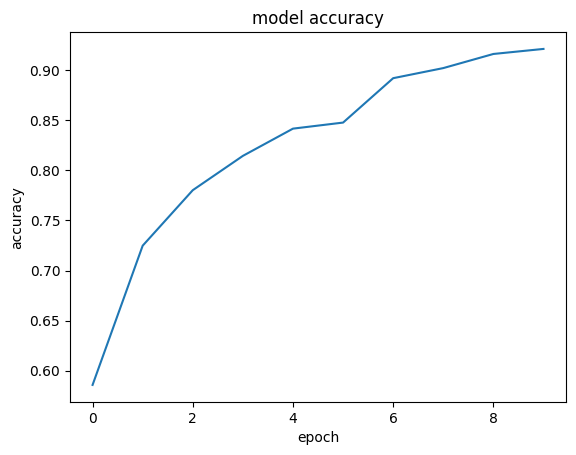

In [ ]:


np.random.seed(seed)
tf.random.set_seed(seed)


modelC = Sequential()
modelC.add(Conv2D(32, (3, 3), strides=1, padding="valid", input_shape=(w, h,1), activation='relu'))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

modelC.add(Flatten())
modelC.add(Dense(128, activation='relu'))
modelC.add(Dense(num_classes, activation='softmax'))

modelC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


# Fit the model using all of the data
history = modelC.fit(X, Y, epochs=10, batch_size=32, verbose=1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()



In [ ]:

ts = int(time.time())
file_path = f"C:/production/{ts}/"
modelC.save(filepath=file_path, save_format='tf')


In [ ]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)


# Load data
X =[]
Y =[]
for filename in glob.glob('/content/drive/MyDrive/CNN-Nokia-vs-iPhone/nokia/*'):
    im=Image.open(filename).convert('L')
    arr = np.array(im)
    X.append(arr)
    Y.append(1)  # Jack russel class 

for filename in glob.glob('/content/drive/MyDrive/CNN-Nokia-vs-iPhone/iPhone/*'):
    im=Image.open(filename).convert('L')
    arr = np.array(im)
    X.append(arr)
    Y.append(2)  # Ridgeback class


    
# Convert to NP array
X = np.array(X)


# reshape to be [samples][channels][width][height]
X = X.reshape(X.shape[0], 1, 500, 500).astype('float32')

# Normalize the data
X = X /255

# Encode outputs
Y = np.array(Y)

# randomize the data set - numpy arrays
randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
Y = Y[randomize]


Y = tf.keras.utils.to_categorical(Y)
num_classes = Y.shape[1]

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
<ipython-input-29-7fcc832540f2>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)


ValueError: ignored

Epoch 1/10
21/21 [==============================] - 2s 67ms/step - loss: 0.7358 - acc: 0.5531 - val_loss: 0.6475 - val_acc: 0.5770
Epoch 2/10
21/21 [==============================] - 1s 41ms/step - loss: 0.5967 - acc: 0.6936 - val_loss: 0.5704 - val_acc: 0.7281
Epoch 3/10
21/21 [==============================] - 1s 39ms/step - loss: 0.5091 - acc: 0.7922 - val_loss: 0.5470 - val_acc: 0.7221
Epoch 4/10
21/21 [==============================] - 1s 35ms/step - loss: 0.4482 - acc: 0.8027 - val_loss: 0.5189 - val_acc: 0.7492
Epoch 5/10
21/21 [==============================] - 1s 56ms/step - loss: 0.3780 - acc: 0.8565 - val_loss: 0.5124 - val_acc: 0.7523
Epoch 6/10
21/21 [==============================] - 1s 59ms/step - loss: 0.3443 - acc: 0.8520 - val_loss: 0.5758 - val_acc: 0.7069
Epoch 7/10
21/21 [==============================] - 1s 45ms/step - loss: 0.3022 - acc: 0.8864 - val_loss: 0.4965 - val_acc: 0.7764
Epoch 8/10
21/21 [==============================] - 1s 41ms/step - loss: 0.2572 - a

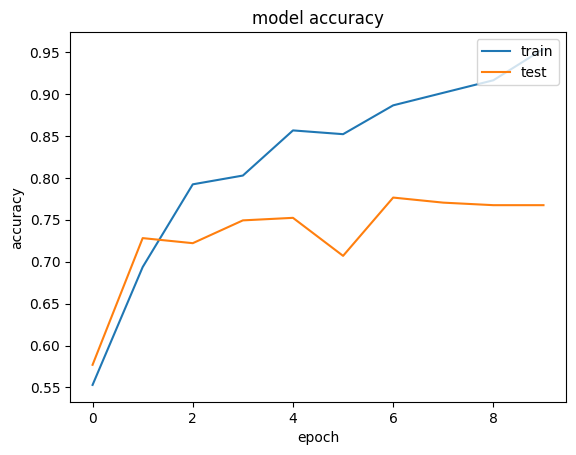

In [ ]:
np.random.seed(seed)
tf.random.set_seed(seed)

modelC = Sequential()
modelC.add(Conv2D(32, (3, 3), strides=1, padding="valid", input_shape=(w, h, 1), activation='relu'))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

modelC.add(Flatten())
modelC.add(Dense(128, activation='relu'))
modelC.add(Dense(num_classes, activation='softmax'))


modelC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = modelC.fit(X, Y, validation_split=0.33, epochs=10, batch_size=32, verbose=1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
modelC = Sequential()
modelC.add(Conv2D(32, (3, 3), strides=1, padding="valid", input_shape=(1, 32, 32), activation='relu', data_format='channels_first'))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid", data_format='channels_first'))

modelC.add(Conv2D(64, (3, 3), strides=1, padding="valid", activation='relu', data_format='channels_first'))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid", data_format='channels_first'))

modelC.add(Flatten())
modelC.add(Dense(128, activation='relu'))
modelC.add(Dense(num_classes, activation='softmax'))

modelC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = modelC.fit(X, Y, validation_split=0.33, epochs=20, batch_size=50, verbose=1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Epoch 1/20


ValueError: ignored

In [ ]:
import requests
import json

w = 32
h = 32

# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

correct = 0

#url = 'http://localhost:8501/v1/models/img_classifier:predict'
url = 'http://20.245.179.46:8501/v1/models/img_classifier:predict'

def make_prediction(instances):
    data = json.dumps({"signature_name": "serving_default", "instances": instances.tolist()})
    headers = {"content-type": "application/json"}
    json_response = requests.post(url, data=data, headers=headers)
    predictions = json.loads(json_response.text)["predictions"]
    return predictions


rawImages = []
instances = []


for filename in glob.glob('/content/drive/MyDrive/CNN-Nokia-vs-iPhone/nokia/*'):
    im=Image.open(filename)
    rawImages.append(im)
    im = im.convert('L')
    im = im.resize((w,h),Image.ANTIALIAS)
    X = np.array(im)
    # Normalize the data
    X = X /255
    instances.append(X)
        
        
for filename in glob.glob('/content/drive/MyDrive/CNN-Nokia-vs-iPhone/iPhone/*'):
    im=Image.open(filename)
    rawImages.append(im)
    im = im.convert('L')
    im = im.resize((w,h),Image.ANTIALIAS)
    X = np.array(im)
    # Normalize the data
    X = X /255
    instances.append(X)

    
instances = np.array(instances)
instances = instances.reshape(instances.shape[0],w, h, 1).astype('float32')

predictions = make_prediction(instances)

for i, pred in enumerate(predictions):
    imgplot = plt.imshow(rawImages[i])
    plt.show()
    if np.argmax(pred) == 1:
        print("Jack Russel")
    else:
        print("Ridgeback")

ConnectionError: ignored

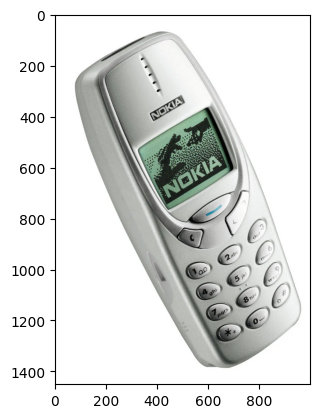

NameError: ignored

In [ ]:
for filename in glob.glob('/content/drive/MyDrive/CNN-Nokia-vs-iPhone/unseen/*'):
    im=Image.open(filename)
    plt.imshow(im)
    plt.show()
    readable_prediction(filename)

